

#   데이터 불러오기 및 전처리 수행




### 데이터 불러오기 및 결측치 제거

In [184]:
#한글폰트 설치
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
# 데이터셋 불러오기
df = pd.read_csv('/content/drive/MyDrive/AI_05/vgames2.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [188]:
df.isna().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [189]:
# 결측치 포함된 행 제거
df.dropna(axis=0, inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 데이터 주변 양식 맞추기

In [190]:
#출시연도 양식 적용 되었는지 확인 용도
df.loc[74]

Name           Age of Empires III: Complete Collection
Platform                                            PC
Year                                               9.0
Genre                                         Strategy
Publisher                       Microsoft Game Studios
NA_Sales                                          0.01
EU_Sales                                          0.12
JP_Sales                                             0
Other_Sales                                       0.03
Name: 74, dtype: object

In [191]:
# 출시연도 양식 맞추기
def digit_int_4(num):
# 출시연도 양식 0 ~ 20일 때, 2000년대로 바꾸기
    if num in range(0,20):
        return num + 2000
# 출시연도 86~ 98일 때, 1900년대로 바꾸기
    elif num in range(86, 98):
        return num + 1900
    else:
        return num
df['Year']=df['Year'].apply(digit_int_4)
df.loc[74]

Name           Age of Empires III: Complete Collection
Platform                                            PC
Year                                            2009.0
Genre                                         Strategy
Publisher                       Microsoft Game Studios
NA_Sales                                          0.01
EU_Sales                                          0.12
JP_Sales                                             0
Other_Sales                                       0.03
Name: 74, dtype: object

In [192]:
# 발매량 양식 맞추기
def sales_mk_tr(col):
    temp_list = []

    for i in col:
        if i.endswith('M') :
            temp = float(i.replace("M", ""))  # ','제거 후  int로 변환
            temp = temp * 10 ** 6   # M = 10^6
            temp_list.append(temp)  #변환 데이터를 리스트로 추가

        elif i.endswith('K') :
            temp = float(i.replace("K", ""))  # ','제거 후  int로 변환
            temp = temp * 10 ** 3   # K = 10^3
            temp_list.append(temp)  #변환 데이터를 리스트로 추가
        else:
            temp = float(i)
            temp = temp * 10 ** 6   # 대부분의 데이터는 100만장을 기준으로 집계되는 것으로 보임
            temp_list.append(temp)
    return temp_list

df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].apply(sales_mk_tr).copy()


In [193]:

df.loc[36]

Name           Advance Wars: Dual Strike
Platform                              DS
Year                              2005.0
Genre                           Strategy
Publisher                       Nintendo
NA_Sales                        300000.0
EU_Sales                         30000.0
JP_Sales                         40000.0
Other_Sales                      30000.0
Name: 36, dtype: object

In [194]:
# 양식 적용 되었는지 비교
df.loc[36]

Name           Advance Wars: Dual Strike
Platform                              DS
Year                              2005.0
Genre                           Strategy
Publisher                       Nintendo
NA_Sales                        300000.0
EU_Sales                         30000.0
JP_Sales                         40000.0
Other_Sales                      30000.0
Name: 36, dtype: object

In [195]:
#글로벌 판매량 생성
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [196]:
#연도별 섹션 데이터를 저장할 리스트 생성
section = []

# 열에 추가할 데이터를 for문으로 구현
for row in df['Year'] :
    if row > 2009:
        # 섹션 4부터 내림차순
        section.append(3)

    elif row > 1999:
        # 섹션 4부터 내림차순
        section.append(2)

    elif row > 1989:
        # 섹션 4부터 내림차순
        section.append(1)
    else :
        section.append(0)

df['Section'] = section

# 지역별 / 연도별 / 플랫폼별 선호도 분석

### 지역별 선호 장르 (미국/유럽/일본)

In [197]:
# 지역별 장르,연도 그룹화
gb = df[['NA_Sales', 'EU_Sales', 'JP_Sales','Year', 'Global_Sales','Section' ]].groupby(df['Genre'])

### 연도별 선호 장르 (미국/유럽/일본/글로벌)

In [198]:
### 연도별 선호 장르 (글로벌)
gb2 = df.groupby(['Genre', 'Section'])['Global_Sales'].sum()
gb2

Genre         Section
Action        0           51100000.0
              1          139150000.0
              2          853130000.0
              3          669600000.0
Adventure     0            4780000.0
              1           44800000.0
              2          123590000.0
              3           60850000.0
Fighting      0            7240000.0
              1          123510000.0
              2          231260000.0
              3           81530000.0
Misc          0            8440000.0
              1           63430000.0
              2          478530000.0
              3          229300000.0
Platform      0          123160000.0
              1          207970000.0
              2          376130000.0
              3          120730000.0
Puzzle        0           62750000.0
              1           38940000.0
              2          117860000.0
              3           21180000.0
Racing        0           12190000.0
              1          148720000.0
              2 

In [199]:
gb2.unstack()

Section,0,1,2,3
Genre,,,,
Action,51100000.0,139150000.0,853130000.0,669600000.0
Adventure,4780000.0,44800000.0,123590000.0,60850000.0
Fighting,7240000.0,123510000.0,231260000.0,81530000.0
Misc,8440000.0,63430000.0,478530000.0,229300000.0
Platform,123160000.0,207970000.0,376130000.0,120730000.0
Puzzle,62750000.0,38940000.0,117860000.0,21180000.0
Racing,12190000.0,148720000.0,438000000.0,123640000.0
Role-Playing,15250000.0,182770000.0,412200000.0,291290000.0
Shooter,59770000.0,68890000.0,433450000.0,462640000.0


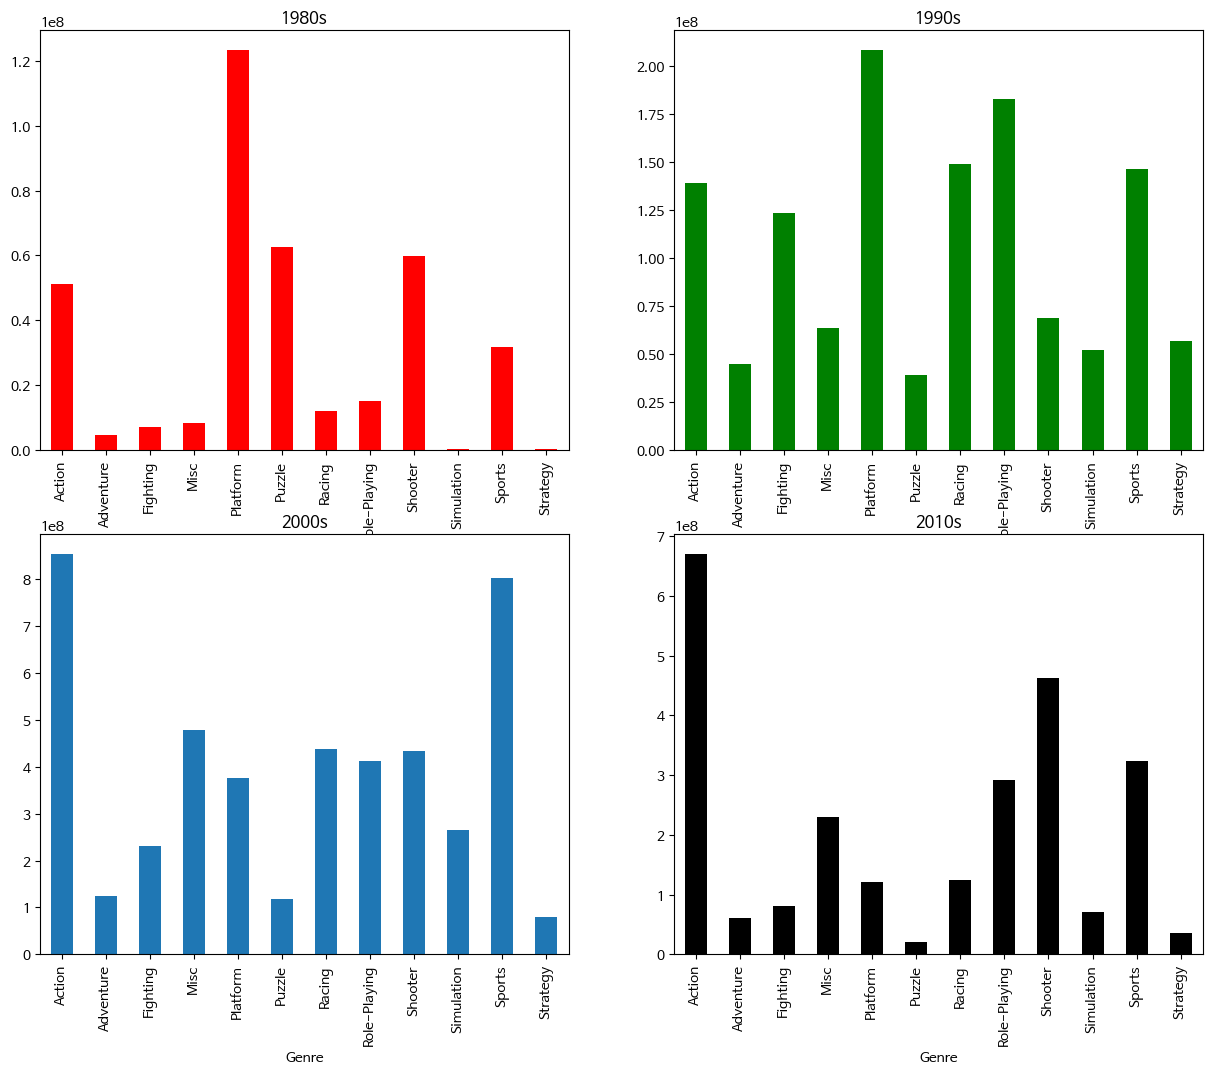

In [200]:
# plt 라이브러리 불러오기
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=False)
plt.rc('font', family='NanumBarunGothic')
gb2.unstack().loc[:,0].plot.bar(ax=axes[0,0], figsize=(15,12), color='r'); axes[0,0].set_title('1980s');
gb2.unstack().loc[:,1].plot.bar(ax=axes[0,1], color='g'); axes[0,1].set_title('1990s');
gb2.unstack().loc[:,2].plot.bar(ax=axes[1,0]); axes[1,0].set_title('2000s');
gb2.unstack().loc[:,3].plot.bar(ax=axes[1,1], color='black'); axes[1,1].set_title('2010s');

## 플랫폼별 판매량 비교

In [201]:
# 플랫폼, 시대에 따른 판매량 그룹화
df.groupby(['Platform','Section'])['Global_Sales'].sum()

Platform  Section
2600      0          8.598000e+07
3DO       1          1.000000e+05
3DS       3          2.318200e+08
DC        1          8.540000e+06
          2          7.410000e+06
DS        0          2.000000e+04
          2          6.875700e+08
          3          1.296000e+08
GB        0          6.640000e+07
          1          1.590300e+08
          2          2.900000e+07
GBA       2          3.047600e+08
GC        2          1.960200e+08
GEN       1          2.835000e+07
GG        1          4.000000e+04
N64       0          9.000000e+05
          1          1.786500e+08
          2          3.721000e+07
NES       0          2.235100e+08
          1          2.754000e+07
NG        1          1.440000e+06
PC        0          7.000000e+04
          1          4.996000e+07
          2          8.344000e+07
          3          1.194800e+08
PCFX      1          3.000000e+04
PS        0          9.000000e+04
          1          5.844100e+08
          2          1.406600e

In [202]:
# 최근 10년 판매량 Data 기준, 결측치 제거
gp = df.groupby(['Platform','Section'])['Global_Sales'].sum().unstack().loc[:,3]
gp.dropna(axis=0,inplace=True)
gp = pd.DataFrame(gp)
gp.columns = ['2010년대 게임 판매량']
gp

,2010년대 게임 판매량
Platform,
3DS,231820000.0
DS,129600000.0
PC,119480000.0
PS2,5570000.0
PS3,601190000.0
PS4,275780000.0
PSP,64310000.0
PSV,61560000.0
Wii,223460000.0


array([<Axes: ylabel='2010년대 게임 판매량'>], dtype=object)

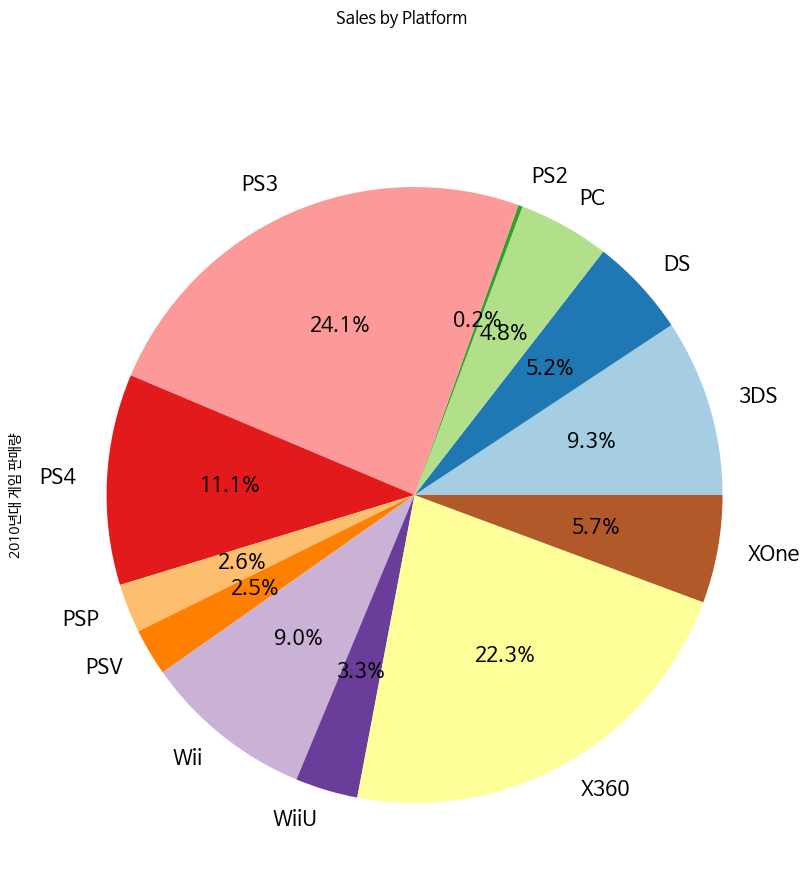

In [203]:
#define Seaborn color palette to use
colors = sns.color_palette('Paired')

gp.plot.pie(subplots=True, title = "Sales by Platform",autopct='%.1f%%', legend=False, fontsize=15, figsize = (10,10), colors = colors)

## 최다 판매량 게임

In [204]:
#플랫폼별 올타임 판매량 최고는?
print(df['Global_Sales'].idxmax())
print(df['NA_Sales'].idxmax())
print(df['EU_Sales'].idxmax())
print(df['JP_Sales'].idxmax())

2908
2908
2908
7829


In [205]:
print('글로벌 최다 판매 게임\n',df.loc[2908])
print('\n북미 최다 판매 게임\n',df.loc[2908])
print('\n유럽 최다 판매 게임\n',df.loc[2908])
print('\n일본 최다 판매 게임\n',df.loc[7829])

글로벌 최다 판매 게임
 Name            Wii Sports
Platform               Wii
Year                2006.0
Genre               Sports
Publisher         Nintendo
NA_Sales        41490000.0
EU_Sales        29020000.0
JP_Sales         3770000.0
Other_Sales      8460000.0
Global_Sales    82740000.0
Section                  2
Name: 2908, dtype: object

북미 최다 판매 게임
 Name            Wii Sports
Platform               Wii
Year                2006.0
Genre               Sports
Publisher         Nintendo
NA_Sales        41490000.0
EU_Sales        29020000.0
JP_Sales         3770000.0
Other_Sales      8460000.0
Global_Sales    82740000.0
Section                  2
Name: 2908, dtype: object

유럽 최다 판매 게임
 Name            Wii Sports
Platform               Wii
Year                2006.0
Genre               Sports
Publisher         Nintendo
NA_Sales        41490000.0
EU_Sales        29020000.0
JP_Sales         3770000.0
Other_Sales      8460000.0
Global_Sales    82740000.0
Section                  2
Name: 2908, dty

In [206]:
#게임별 최고 판매량 게임 구하기
df2 = df[['Name','NA_Sales', 'EU_Sales','JP_Sales','Global_Sales'] ]

df2 = df2.groupby('Name').sum()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11295 entries, '98 Koshien to ¡Shin Chan Flipa en colores!
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      11295 non-null  float64
 1   EU_Sales      11295 non-null  float64
 2   JP_Sales      11295 non-null  float64
 3   Global_Sales  11295 non-null  float64
dtypes: float64(4)
memory usage: 441.2+ KB


In [207]:
df2.loc[df2['Global_Sales'].idxmax()]
# 집계량의 차이는 있어도, 결과는 같다

NA_Sales        41490000.0
EU_Sales        29020000.0
JP_Sales         3770000.0
Global_Sales    82740000.0
Name: Wii Sports, dtype: float64

In [208]:
df2.loc[df2['JP_Sales'].idxmax()]

NA_Sales        11270000.0
EU_Sales         8890000.0
JP_Sales        10220000.0
Global_Sales    31380000.0
Name: Pokemon Red/Pokemon Blue, dtype: float64

In [209]:
# 단위기간 동안 최대 판매 게임
df.loc[df.groupby(['Section'])['Global_Sales'].idxmax()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Section
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0,0
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0,1
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0,2
4343,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000.0,4940000.0,240000.0,1670000.0,21820000.0,3


In [210]:
# 최근 10년 데이터 추출
#sort_value.head(10)

# 그 결과를 새로운 변수에 할당합니다.
is_2010s = df['Section'] == 3

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
s10 = df[is_2010s]

# 결과를 출력합니다.
s10.sort_values(by=['Global_Sales'],ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Section
4343,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000.0,4940000.0,240000.0,1670000.0,21820000.0,3
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7010000.0,9270000.0,970000.0,4140000.0,21390000.0,3
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630000.0,5310000.0,60000.0,1380000.0,16380000.0,3
10621,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5570000.0,3280000.0,5650000.0,820000.0,15320000.0,3
2809,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9030000.0,4280000.0,130000.0,1320000.0,14760000.0,3
6248,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9670000.0,3730000.0,110000.0,1130000.0,14640000.0,3
9070,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5770000.0,5810000.0,350000.0,2310000.0,14240000.0,3
4240,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4990000.0,5880000.0,650000.0,2520000.0,14040000.0,3
6393,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8250000.0,4300000.0,70000.0,1120000.0,13740000.0,3
14120,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5540000.0,5820000.0,490000.0,1620000.0,13470000.0,3


# 다음 분기 게임 설계 가이드라인 설정





## 목차

1.   지역별 게임 장르별 판매량
2.   시대별 게임 장르별 판매량
3.   최근 10년간 플랫폼별 게임 판매량
4.   최다 판매 게임 비교


---




### 지역별 게임 장르별 판매량 (미국 / 유럽 / 일본)

In [211]:
gb[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,858750000.0,513640000.0,156600000.0
Adventure,101790000.0,63660000.0,51870000.0
Fighting,220350000.0,99900000.0,87140000.0
Misc,394730000.0,208150000.0,104180000.0
Platform,445380000.0,200630000.0,130530000.0
Puzzle,121580000.0,50470000.0,56240000.0
Racing,354700000.0,235020000.0,56320000.0
Role-Playing,318760000.0,183090000.0,342930000.0
Shooter,574480000.0,310230000.0,38180000.0


**북미, 유럽, 일본의 게임 판매량 점유율 비교**

array([<Axes: ylabel='NA_Sales'>], dtype=object)

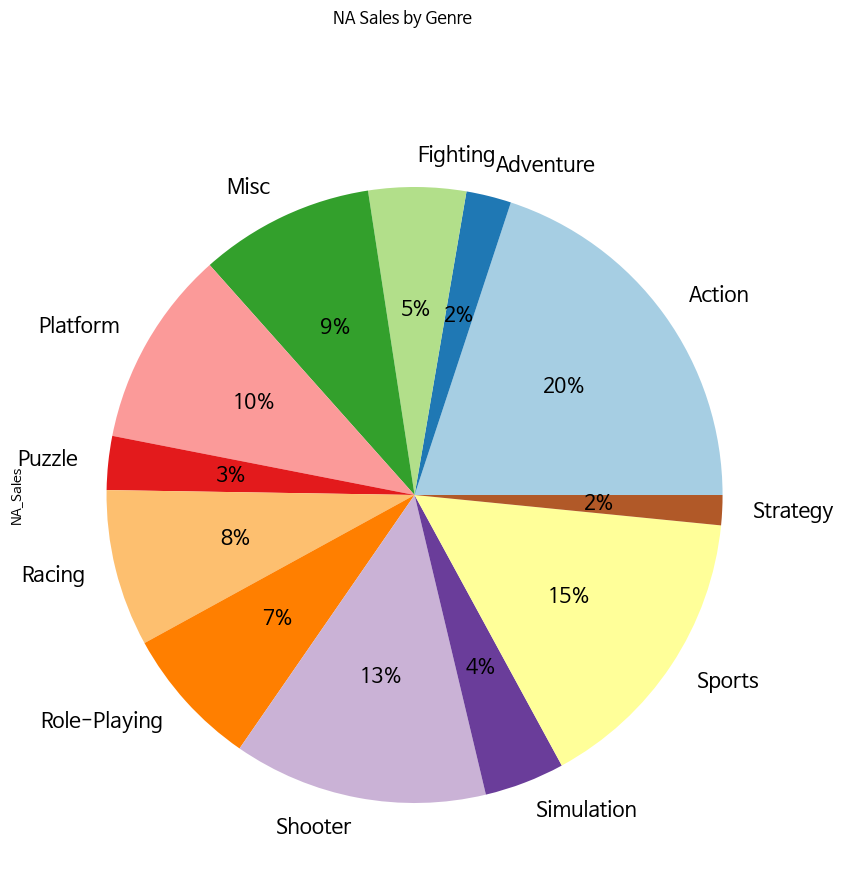

In [212]:
gb['NA_Sales'].sum().plot.pie(subplots=True, figsize = (10,10), title = "NA Sales by Genre", autopct='%1.f%%',fontsize=15, colors=colors)

**북미지역 게임판매 점유율**


> 1. 액션(20%)
>
> 2. 스포츠(15%)
>
> 3. 슈팅(13%)
>
> 4. 플래포머(10%)
>
> 5. 레이싱(8%)



---

array([<Axes: ylabel='EU_Sales'>], dtype=object)

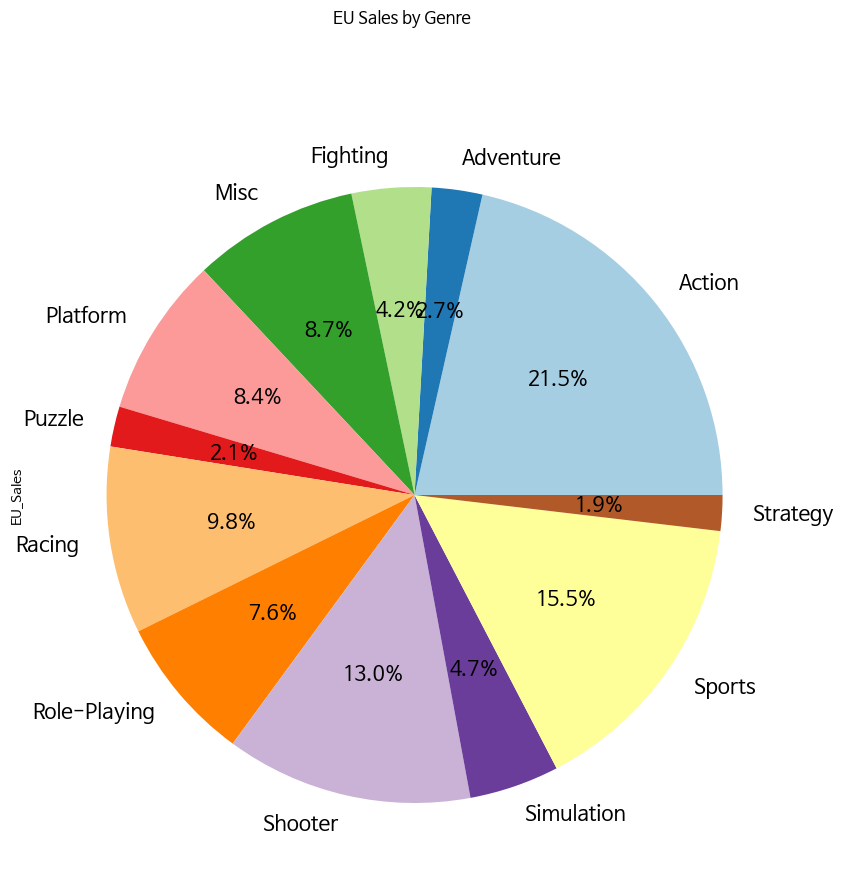

In [213]:
gb['EU_Sales'].sum().plot.pie(subplots=True, figsize = (10,10), title = "EU Sales by Genre", autopct='%.1f%%', fontsize = 15, colors=colors)

**유럽지역 게임판매 점유율**


> 1. 액션(21.5%)
>
> 2. 스포츠(15.5%)
>
> 3. 슈팅(13.0%)
>
> 4. 레이싱(9.8%)
>
> 5. 플래포머(8.4%)



---

array([<Axes: ylabel='JP_Sales'>], dtype=object)

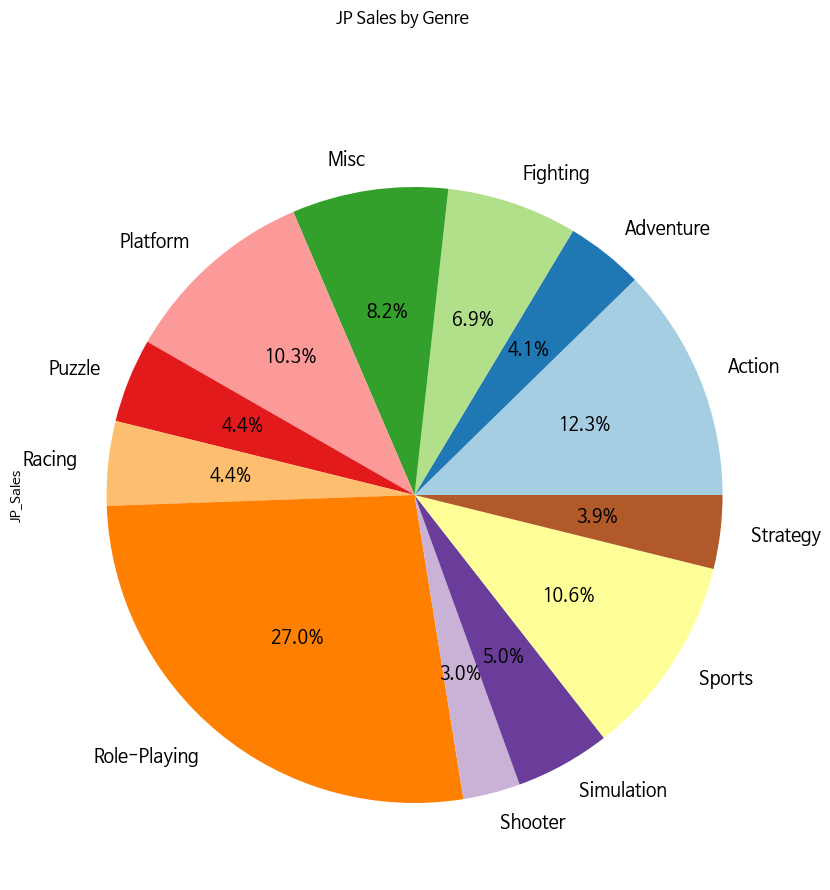

In [214]:
gb['JP_Sales'].sum().plot.pie(subplots=True, figsize = (10,10), title = "JP Sales by Genre", autopct='%.1f%%', fontsize = 13, colors=colors)

**일본지역 게임판매량 점유율**


> 1. 롤플레잉(27.0%)
>
> 2. 액션(12.3%)
>
> 3. 스포츠(10.6%)
>
> 4. 플래포머(10.3%)
>
> 5. 격투(6.9%)



---

### 시대별 게임 장르별 판매량 (글로벌)

**10년 단위 선호 장르 비교**
(왼쪽위부터 80년대, 90년대, 2000년대, 2010년대 게임 장르별 판매량)

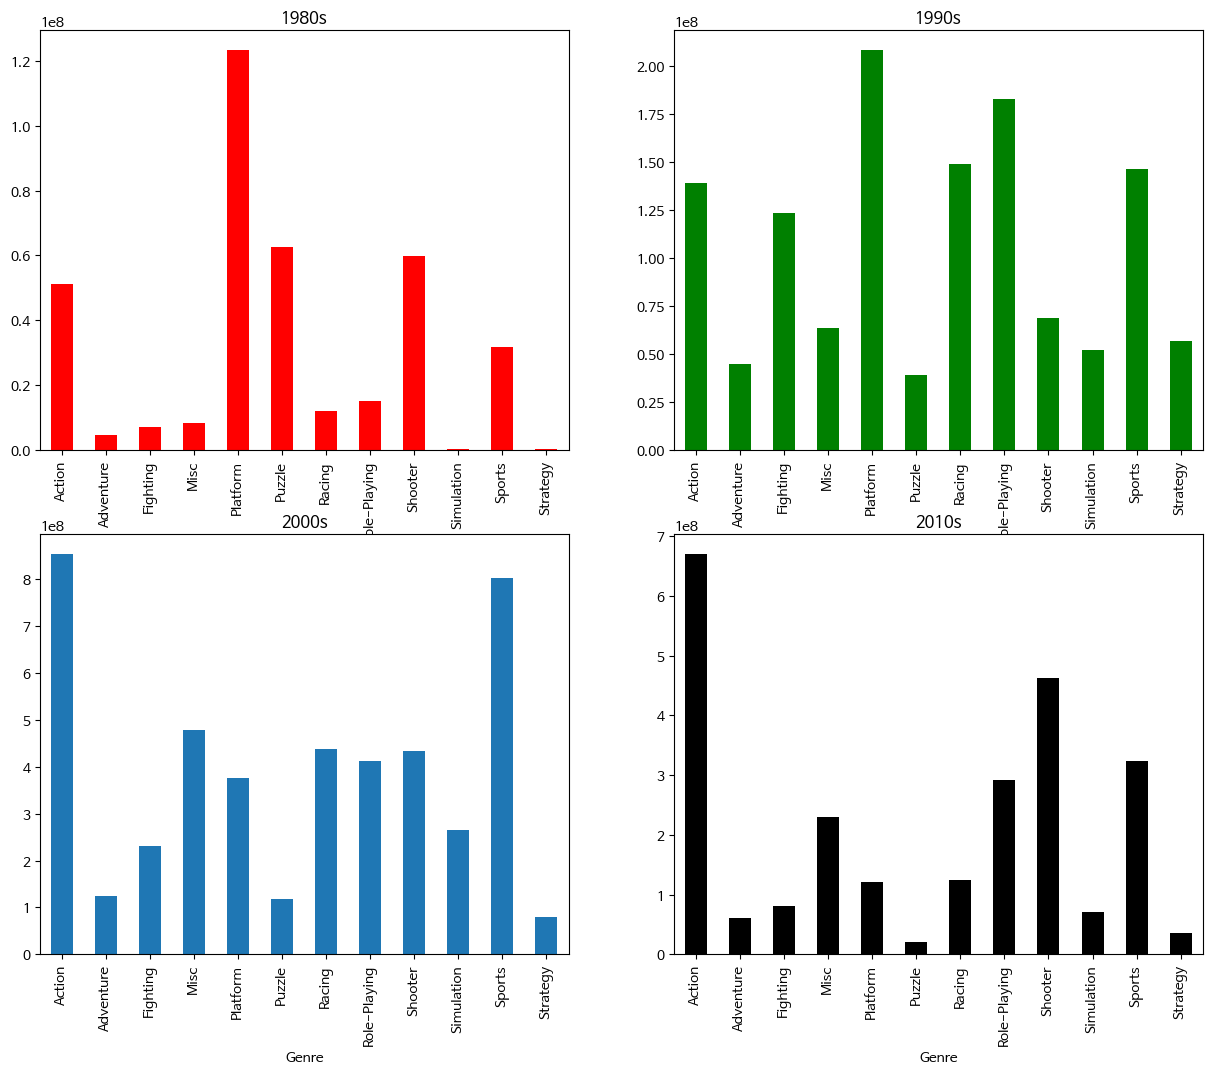

In [215]:
fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=False)
gb2.unstack().loc[:,0].plot.bar(ax=axes[0,0], figsize=(15,12), color='r'); axes[0,0].set_title('1980s');
gb2.unstack().loc[:,1].plot.bar(ax=axes[0,1], color='g'); axes[0,1].set_title('1990s');
gb2.unstack().loc[:,2].plot.bar(ax=axes[1,0]); axes[1,0].set_title('2000s');
gb2.unstack().loc[:,3].plot.bar(ax=axes[1,1], color='black'); axes[1,1].set_title('2010s');

## 최근 10년간 플랫폼별 게임 판매량

In [216]:
gp

,2010년대 게임 판매량
Platform,
3DS,231820000.0
DS,129600000.0
PC,119480000.0
PS2,5570000.0
PS3,601190000.0
PS4,275780000.0
PSP,64310000.0
PSV,61560000.0
Wii,223460000.0


플랫폼 판매량 점유율

array([<Axes: ylabel='2010년대 게임 판매량'>], dtype=object)

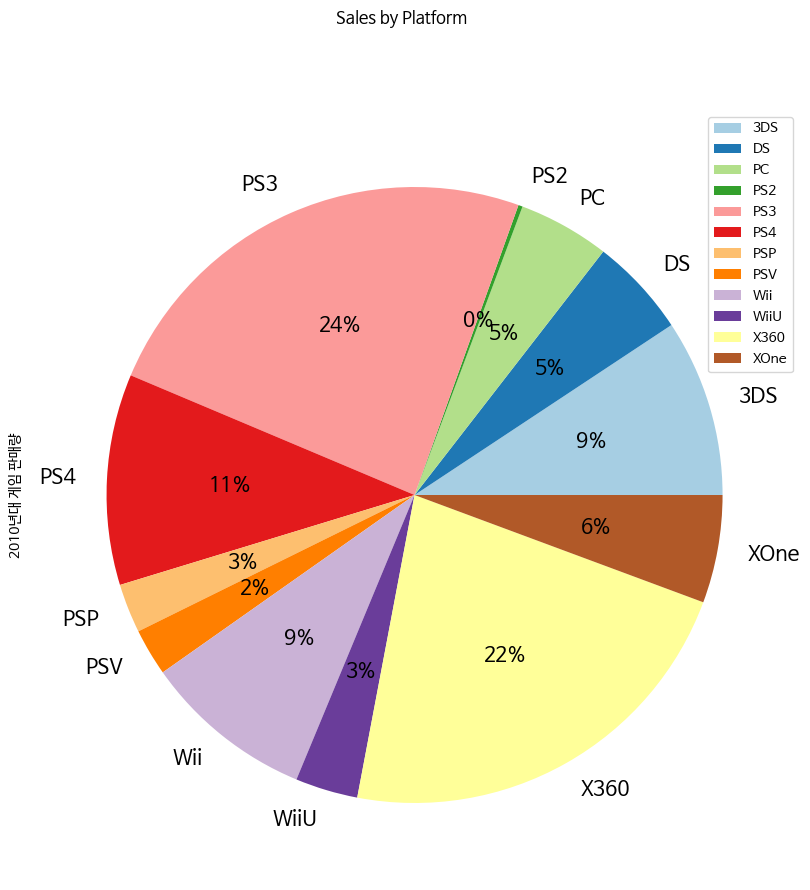

In [217]:
gp.plot.pie(subplots=True, figsize = (10,10), title = "Sales by Platform",autopct='%1.f%%', fontsize=15, colors=colors)



*   PS 시리즈 점유율 35%
*   XBOX 시리즈 점유율 28%
*   닌텐도 시리즈(Wii / Wii U) 점유율 12%

PlayStation 게임 판매량이 제일 높음

---



## 최다 판매량을 세운 게임은?

In [239]:
print('글로벌&북미&유럽 최다 판매 게임\n\n',df2.loc[df2.groupby("Name").sum(numeric_only=True)['Global_Sales'].idxmax()])

글로벌&북미&유럽 최다 판매 게임

 NA_Sales        41490000.0
EU_Sales        29020000.0
JP_Sales         3770000.0
Global_Sales    82740000.0
Name: Wii Sports, dtype: float64


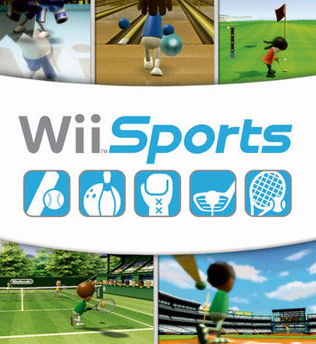

> 글로벌 판매량 : 82,740,000장
>
> 북미 판매량 : 41,490,000장
>
> 유럽 판매량 : 29,020,000장



---



In [234]:
print('일본 최다 판매 게임\n',df2.loc[df2.groupby("Name").sum(numeric_only=True)['JP_Sales'].idxmax()])

일본 최다 판매 게임
 NA_Sales        11270000.0
EU_Sales         8890000.0
JP_Sales        10220000.0
Global_Sales    31380000.0
Name: Pokemon Red/Pokemon Blue, dtype: float64


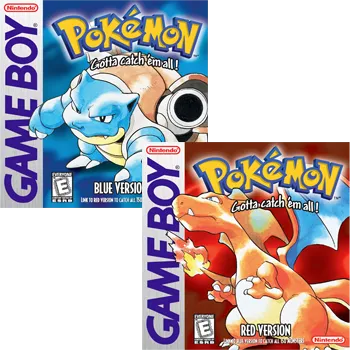

일본 판매량 : 10,220,000


---



2010년대 최다 판매량 게임 Top 10은?

In [267]:
#동일게임이나 플랫폼이 다른 게임판매량 소계
s10_st=s10.groupby("Name").sum(numeric_only=True).sort_values("Global_Sales",ascending=False).head(10).reset_index()[['Name','Global_Sales','NA_Sales','EU_Sales','JP_Sales']]
s10_st

,Name,Global_Sales,NA_Sales,EU_Sales,JP_Sales
0,Grand Theft Auto V,55920000.0,23460000.0,23040000.0,1390000.0
1,Call of Duty: Modern Warfare 3,30840000.0,15580000.0,11290000.0,620000.0
2,Call of Duty: Black Ops II,29730000.0,14080000.0,11050000.0,720000.0
3,Call of Duty: Black Ops,29410000.0,17010000.0,8690000.0,590000.0
4,Call of Duty: Ghosts,27370000.0,14920000.0,9050000.0,480000.0
5,Call of Duty: Black Ops 3,25300000.0,11890000.0,9560000.0,430000.0
6,Minecraft,23750000.0,10820000.0,8850000.0,1150000.0
7,Call of Duty: Advanced Warfare,21890000.0,10440000.0,8180000.0,340000.0
8,Kinect Adventures!,21820000.0,14970000.0,4940000.0,240000.0
9,The Elder Scrolls V: Skyrim,19280000.0,8730000.0,7660000.0,350000.0


In [269]:
#Top10 내 게임 시리즈 합산
ss=[]
for r in s10_st['Name']:
    if "Call of Duty" in r:
        ss.append("Call of Duty Series")
    else:
        ss.append(r)
s10_st['ss']=ss
s10_ss = s10_st.groupby("ss").sum(numeric_only=True).reset_index().sort_values("Global_Sales",ascending=False)
s10_ss

,ss,Global_Sales,NA_Sales,EU_Sales,JP_Sales
0,Call of Duty Series,164540000.0,83920000.0,57820000.0,3180000.0
1,Grand Theft Auto V,55920000.0,23460000.0,23040000.0,1390000.0
3,Minecraft,23750000.0,10820000.0,8850000.0,1150000.0
2,Kinect Adventures!,21820000.0,14970000.0,4940000.0,240000.0
4,The Elder Scrolls V: Skyrim,19280000.0,8730000.0,7660000.0,350000.0


Text(0.5, 1.0, '2010년대 최다 판매 시리즈')

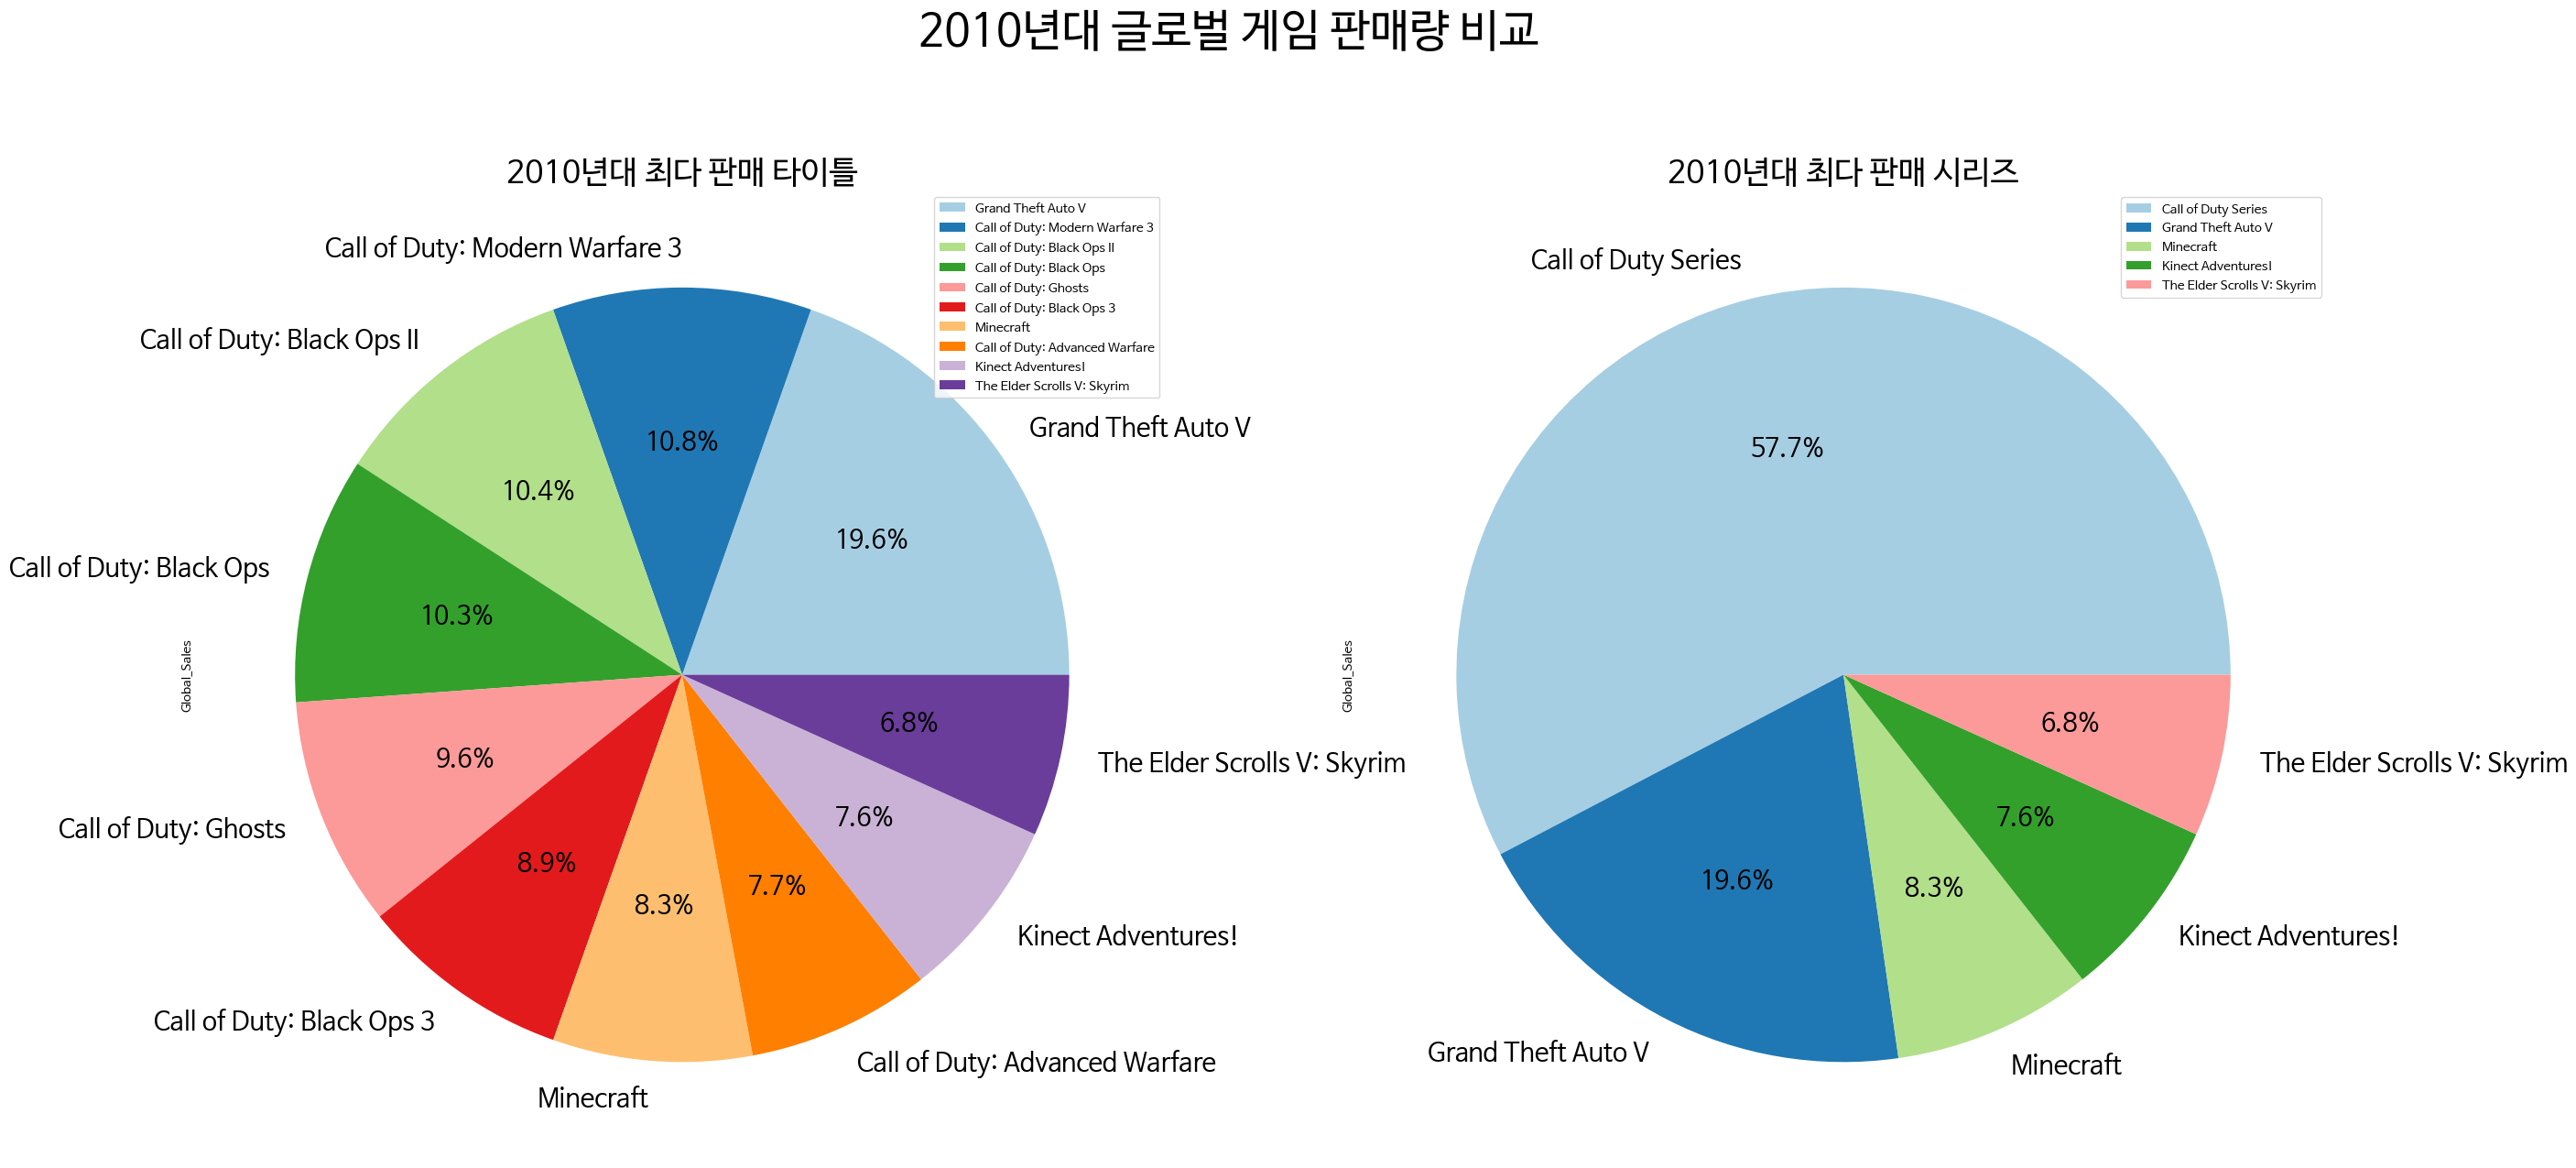

In [271]:
# 2010년대 판매량 시각화
fig, axes = plt.subplots(1,2, figsize=(30,15))
fig.suptitle('2010년대 글로벌 게임 판매량 비교',fontsize=35)
f0= s10_st.plot.pie(ax=axes[0],y='Global_Sales',labels=s10_st['Name'],subplots=False,autopct='%1.1f%%', fontsize=20, colors=colors)
f0.set_title("2010년대 최다 판매 타이틀",fontsize=25)
f1= s10_ss.plot.pie(ax=axes[1],y='Global_Sales',labels=s10_ss['ss'],subplots=False,autopct='%1.1f%%', fontsize=20, colors=colors)
f1.set_title("2010년대 최다 판매 시리즈",fontsize=25)

---

# 결론



*   지역별 게임 장르 선호도는 차이가 있음
    * 공통적으로 액션 및 스포츠 장르의 점유율이 높음

*   시대별로 트렌드의 변화는 존재하였다.
    * 80s : 플래포머, 퍼즐, 슈팅
    * 90s :  플래포머, 롤플레잉, 슈팅
    * 00s :  액션, 스포츠, 레이싱
    * 10s :  액션, 슈팅, 스포츠

*   근 10년간 플랫폼별 게임 판매량은 플레이스테이션 진영이 많다
    * PS4의 판매량이 XOne 판매량의 약 2배인 것을 보아 발매 플랫폼은 플레이스테이션이 유리할 것으로 판단

* 최근 10년간 최대 판매량을 가진 게임은 GTA5이다.
    * 그러나 최다 판매 시리즈는 Call of Duty 시리즈이며 GTA5 판매량대비 약  **3배** 이상이다.
    * 공통적으로 지역별 판매량은 북미가 제일 많이 높다.


*   **따라서 다음 분기에 신규 게임 제작은 북미시장 타겟의 플레이스테이션 플랫폼 슈팅 게임 개발에 착수하는 것이 유리하다.**

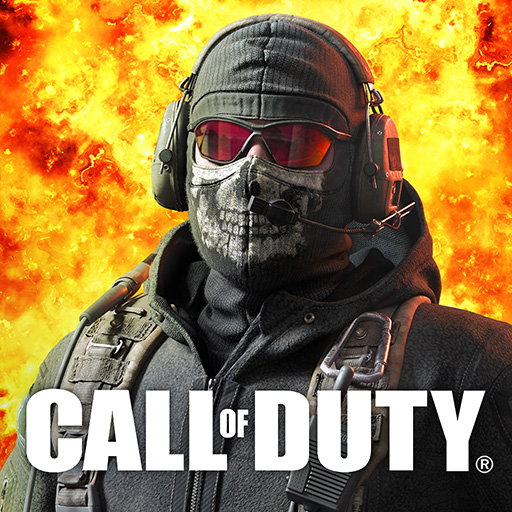